In [61]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [65]:
df.describe()

,ID_Number,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [119]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
df=pd.read_csv("wdbc.data.csv")
print(len(df.columns))
print(len(df.index))

12
569


In [64]:
#Instruction4: Print the names of the features/attributes of your dataset and show the head of the dataset
list(df.columns.values)

['ID_Number',
 'Diagnosis',
 'Radius',
 'Texture',
 'Perimeter',
 'Area',
 'Smoothness',
 'Compactness',
 'Concavity',
 'Comcave_Points',
 'Symetry',
 'Fractal_dimensions']

In [63]:
df.head()

,ID_Number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


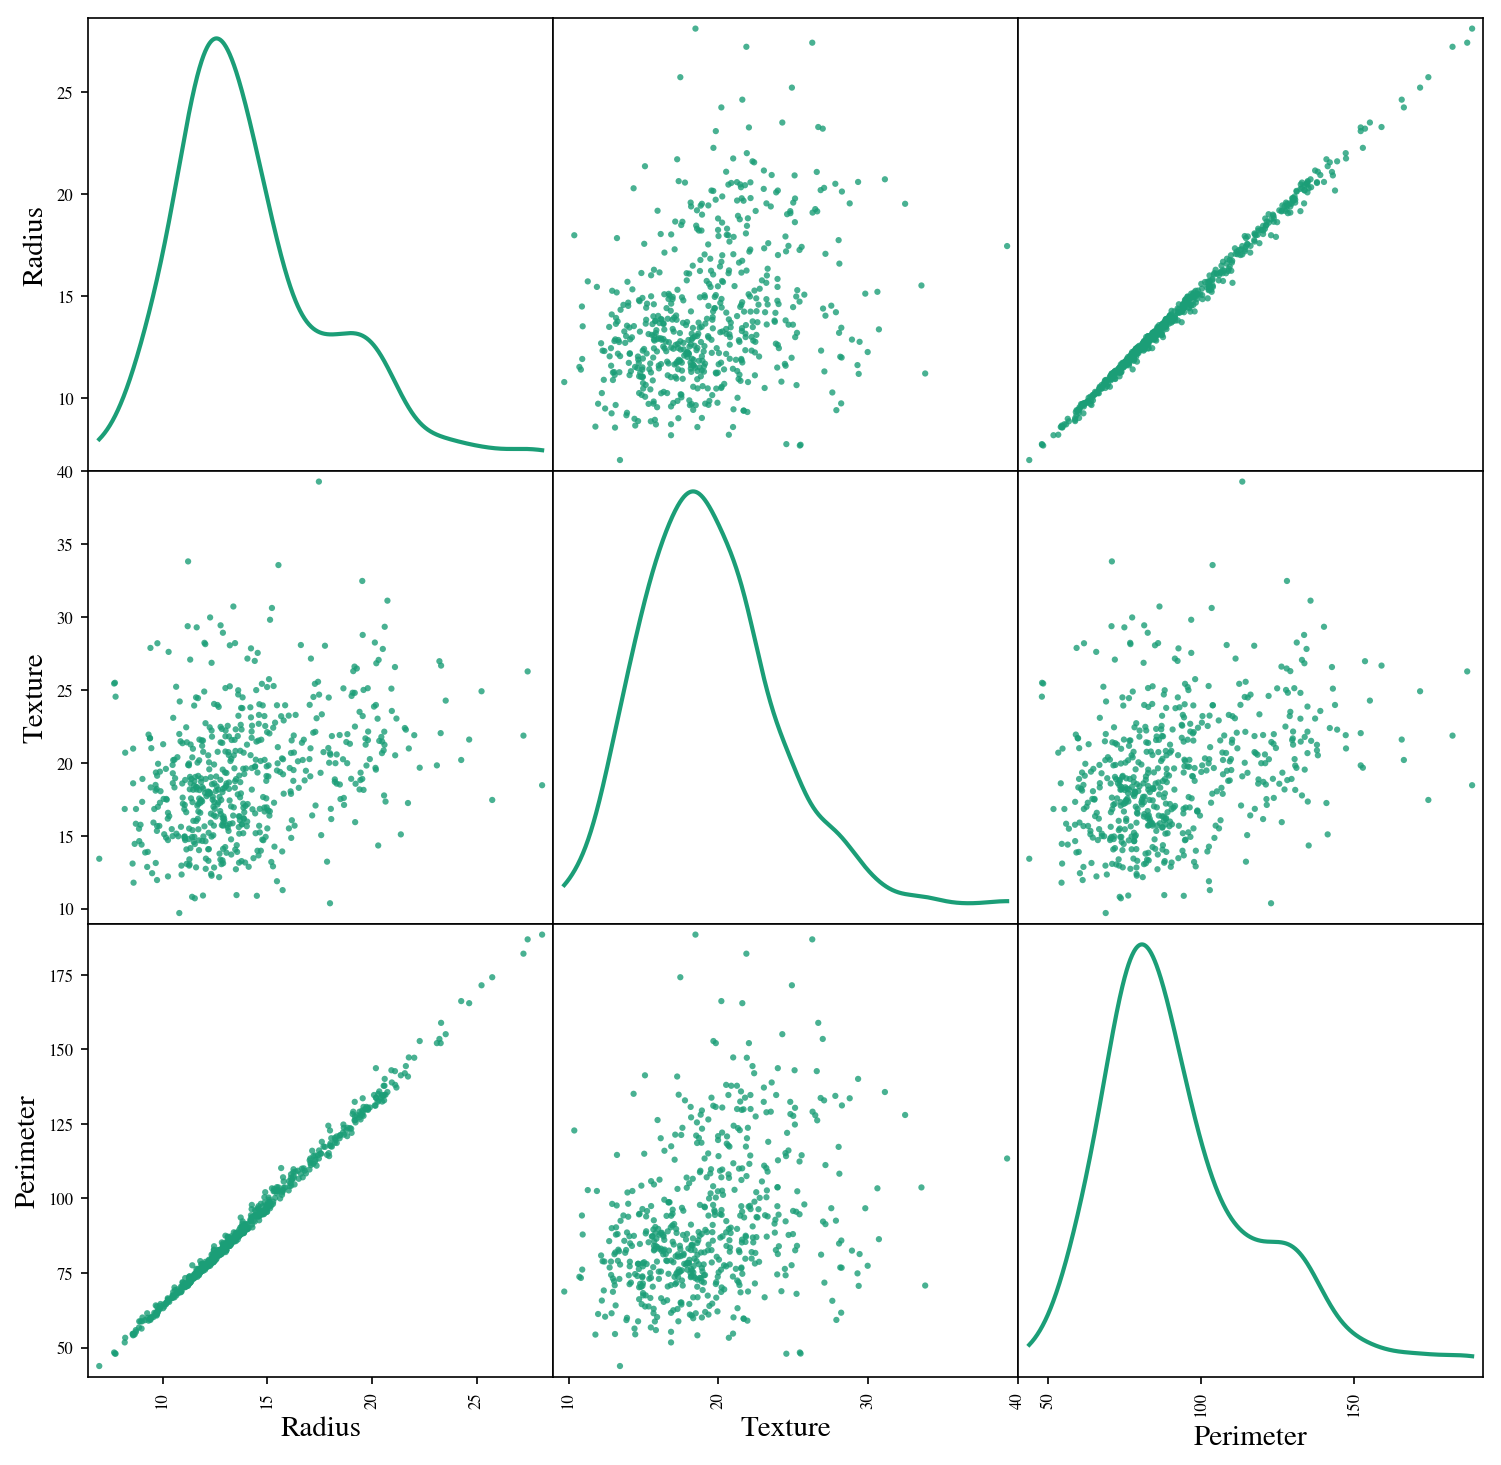

In [67]:
smaller_frame=df[['Radius', 'Texture', 'Perimeter']]
from pandas.tools.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(12, 12), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [97]:
sub_features = pd.DataFrame(df, columns = ['Radius','Texture','Perimeter'])

In [98]:
sub_features.corr()

,Radius,Texture,Perimeter
Radius,1.000000,0.323782,0.997855
Texture,0.323782,1.000000,0.329533
Perimeter,0.997855,0.329533,1.000000


In [120]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable.
from sklearn.linear_model import LinearRegression
X_HD=smaller_frame[['Radius', 'Texture']].values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
Radius_std_vec=X_HDn[:,0]
Radius_std=educ_coll_std_vec.reshape(-1,1)
Perimeter_std_vec=X_HDn[:,1]
Perimeter_std=average_income_std_vec.reshape(-1,1)

In [121]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for 
#testing.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Radius_std, Perimeter_std_vec,train_size=0.75)

In [122]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and 
#test set
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print(clf1.coef_, clf1.intercept_)

[ 0.33805001] 0.0202398289638


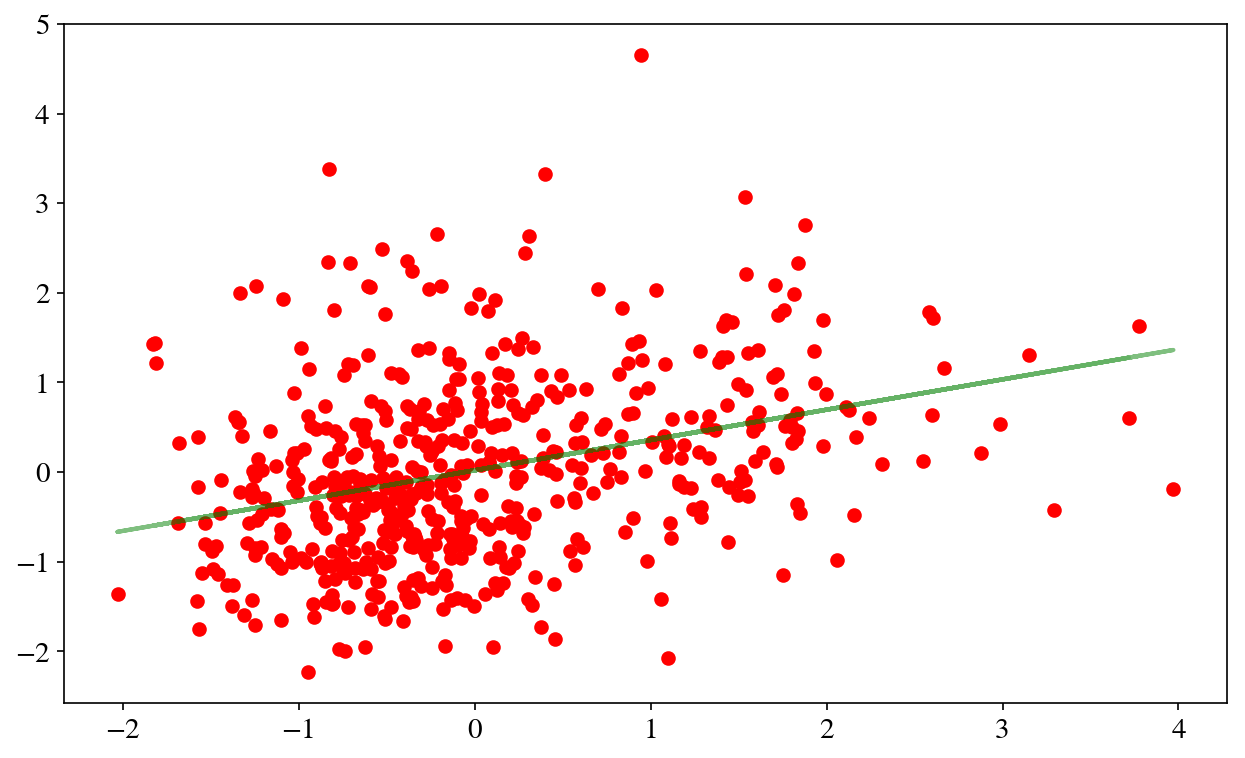

In [123]:
#Instruction10: Plot the scatter against the fit for both training and test data.
plt.scatter(Radius_std_vec, Perimeter_std_vec,c='r')
plt.plot(trains, predicted_train, c='g', alpha=0.5)
plt.plot(tests, predicted_test, c='g', alpha=0.2)

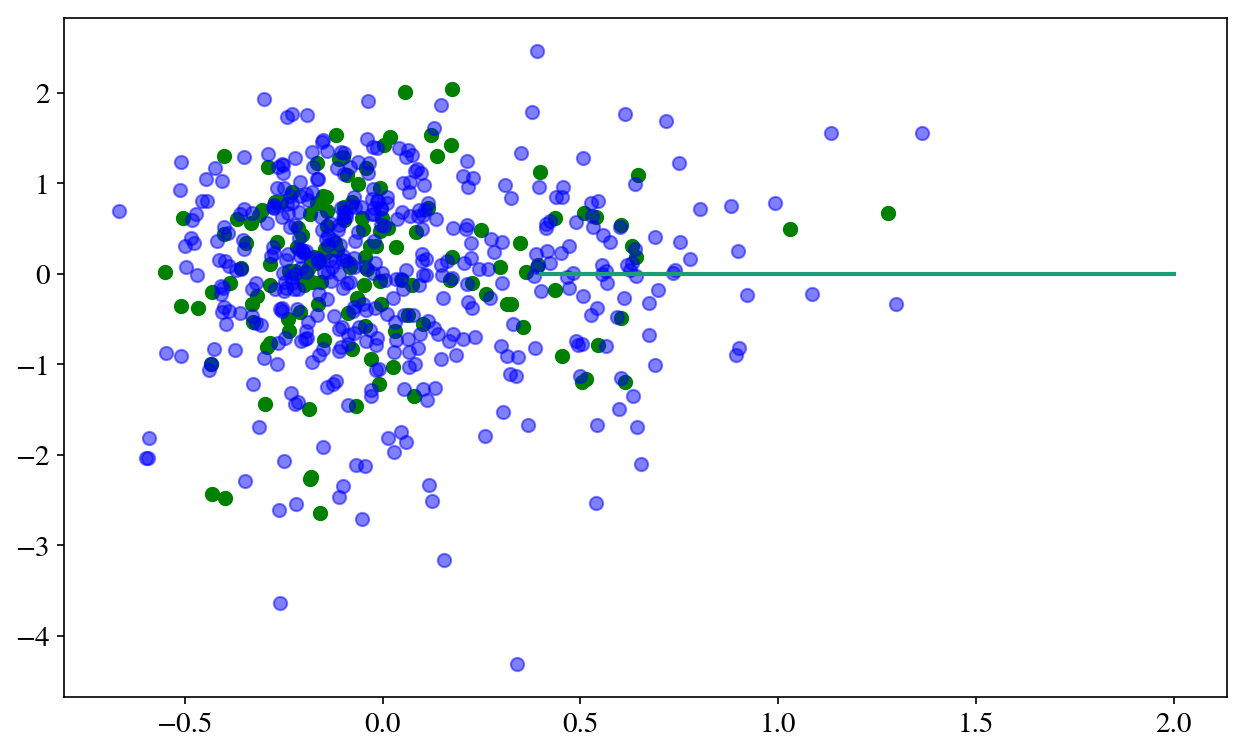

In [124]:
#Instruction11: Look at the residuals, again on both sets.
plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40)
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5)
plt.plot([0.4,2],[0,0])

In [125]:
clf1.score(X_train, y_train), clf1.score(X_test, y_test)

(0.11232412909280176, 0.054483734895493519)

In [126]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print(pca.explained_variance_ratio_)

[ 0.66189095  0.33810905]


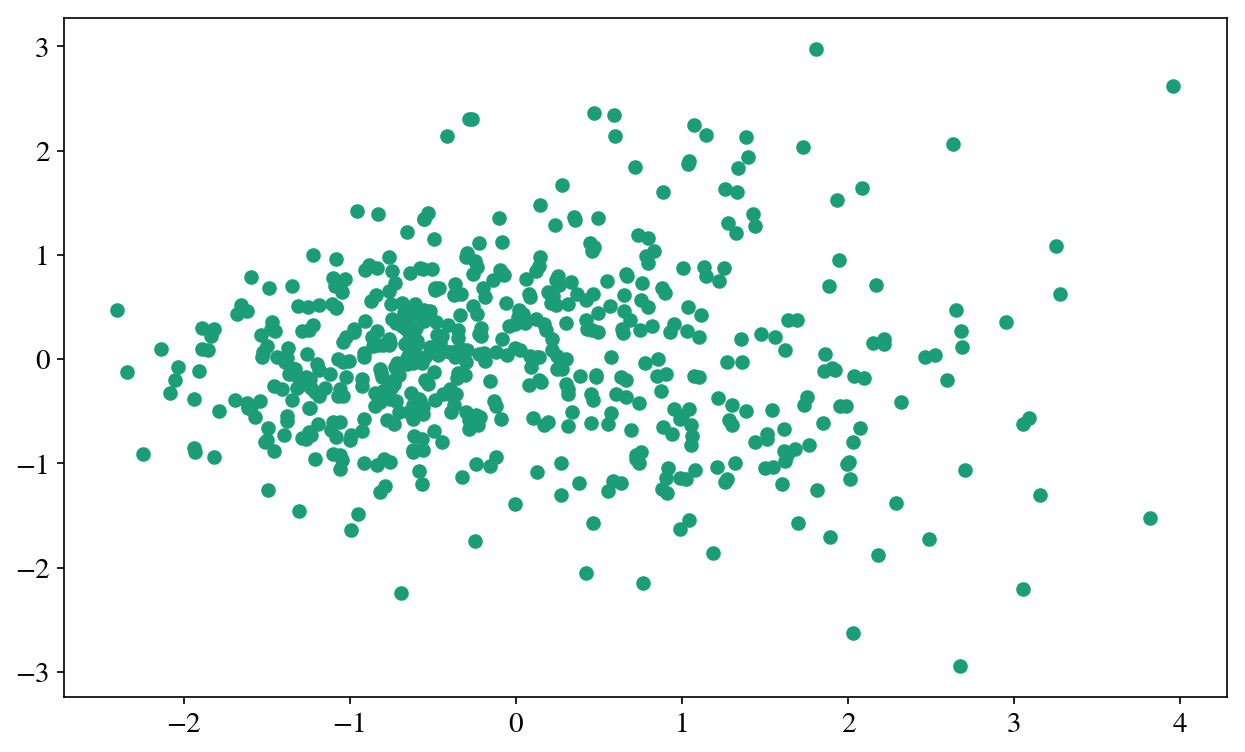

In [127]:
plt.scatter(X[:, 0], X[:, 1])

In [128]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.
pca1 = PCA(n_components=1) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

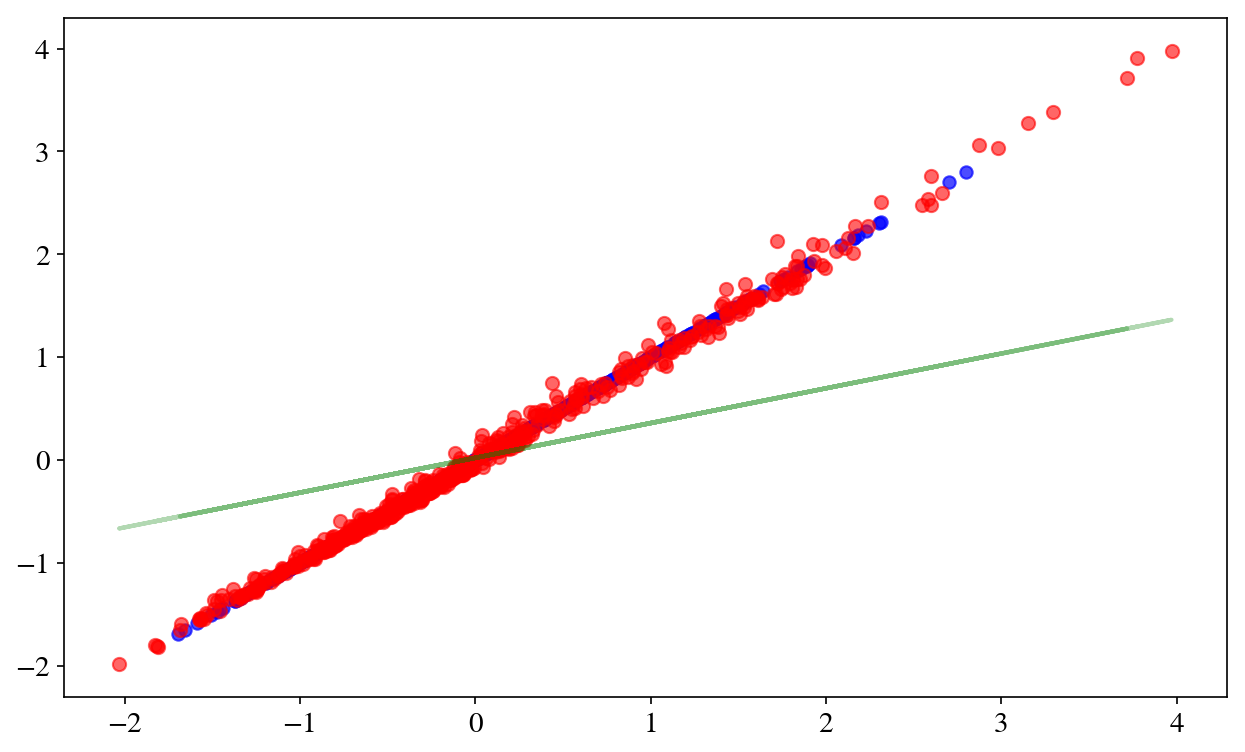

In [129]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7)
plt.scatter(educ_coll_std_vec, average_income_std_vec, s=40, c='r', alpha=0.6)
plt.plot(trains, predicted_train, c='g', alpha=0.3)
plt.plot(tests, predicted_test, c='g', alpha=0.3)

In [ ]:
#Part2: Logistic Regression Instuctions

In [36]:
#Instruction1: Load the array
import numpy as np
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       ])

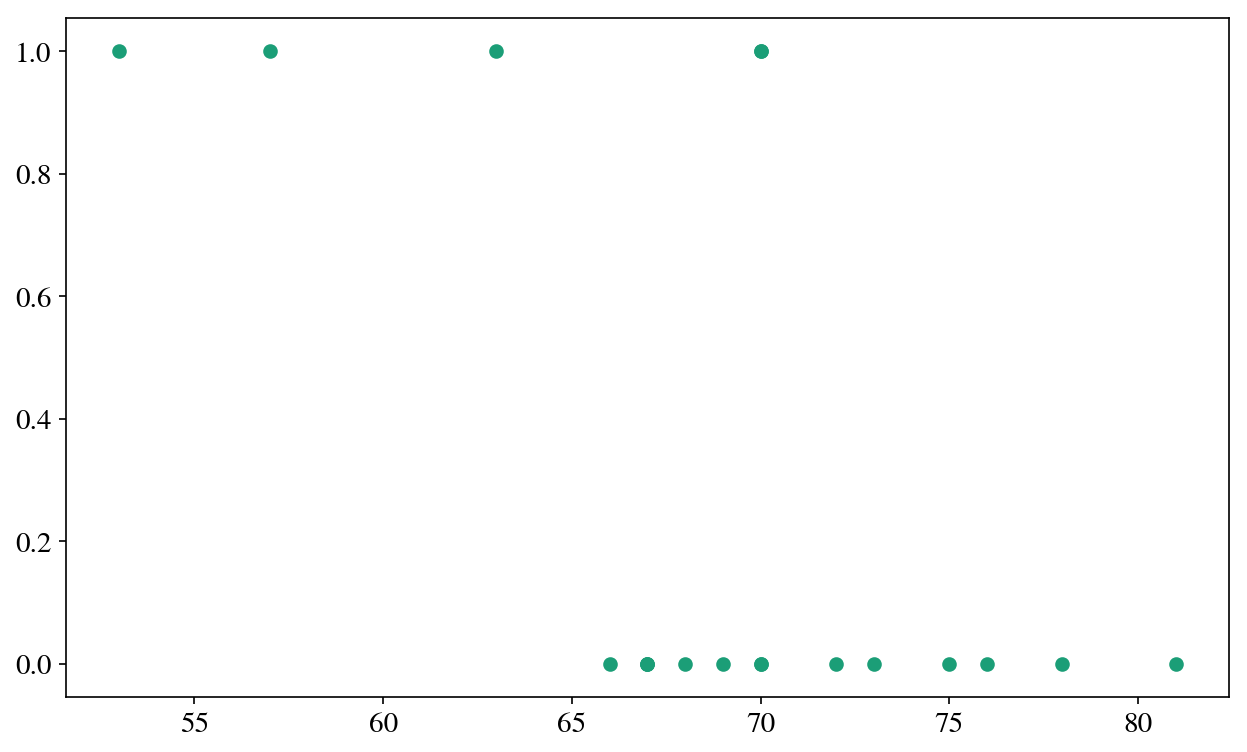

In [37]:
#Instruction2: Plot the array.
import matplotlib.pyplot as plt
x_ = data[:,0]
y_ = data[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_, y_)
plt.show()

In [ ]:
##Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.

In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
x_ = x_.reshape(-1, 1)
y_ = y_.reshape(-1, 1)
reg = LogisticRegression(C=1000.0).fit(x_, y_)

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#predictions 
test_set =np.array([[ 79.,0.],[ 75.,1.],[ 76.,0.], [ 58.,1.]])
x_test = np.array(test_set[:,0])
x_test= x_test.reshape(-1, 1)
predictions = reg.predict(x_test)

In [51]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.
#predictions & probabilities
x_new=np.linspace(20., 90., 15)
probs = reg.predict_proba(x_new.reshape(-1,1))[:, 1]
predicts = reg.predict(x_new.reshape(-1,1))

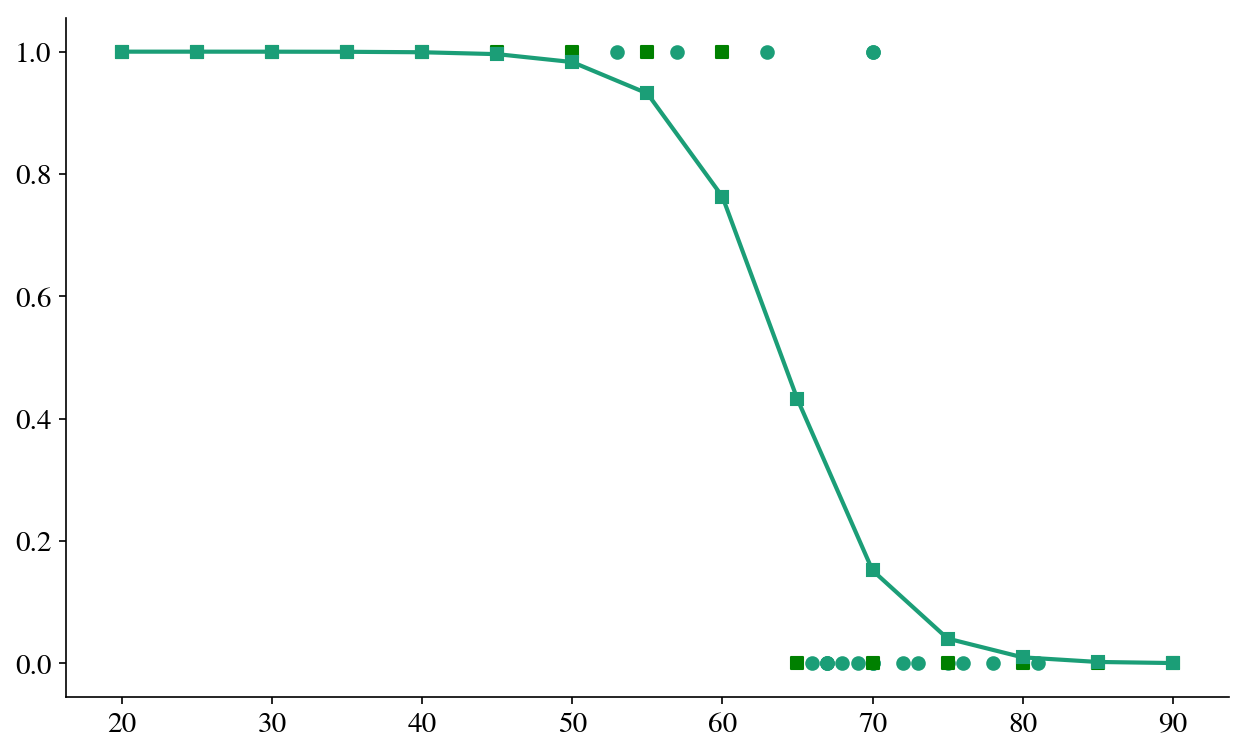

In [52]:
plt.scatter(x_, y_)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.plot(x_new, probs, marker='s')
plt.scatter(x_new, predicts, marker='s', color="green")

In [59]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.
x = data[:,0]
y = data[:,1]
pd.crosstab(y, reg.predict(x.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,14,0
1.0,2,3


In [ ]:
#Part3: Bias and Variance and Cross Validation

In [1]:
#Instruction2: Load your dataset
import pandas as pd
df=pd.read_csv("wdbc.data.csv")
print(len(df.columns))
print(len(df.index))

In [3]:
df.head()

,ID_Number,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Comcave_Points,Symetry,Fractal_dimensions
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [16]:
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE", clf.score(Xte, yte))
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #return ax

In [26]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)
from sklearn.model_selection import train_test_split
import numpy as np
subdf=df[['Radius','Texture']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y =(df['Diagnosis'])
yd=pd.get_dummies(df.Diagnosis)
y=yd.M
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.5)
Xtr=np.concatenate((Xtrain, Xtest))

/Users/amirahalshamrani/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [130]:
df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['ID_Number', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Comcave_Points', 'Symetry', 'Fractal_dimensions', 'randNumCol'], dtype='object')


In [7]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=20).fit(Xtrain, ytrain)

SCORE 0.915789473684


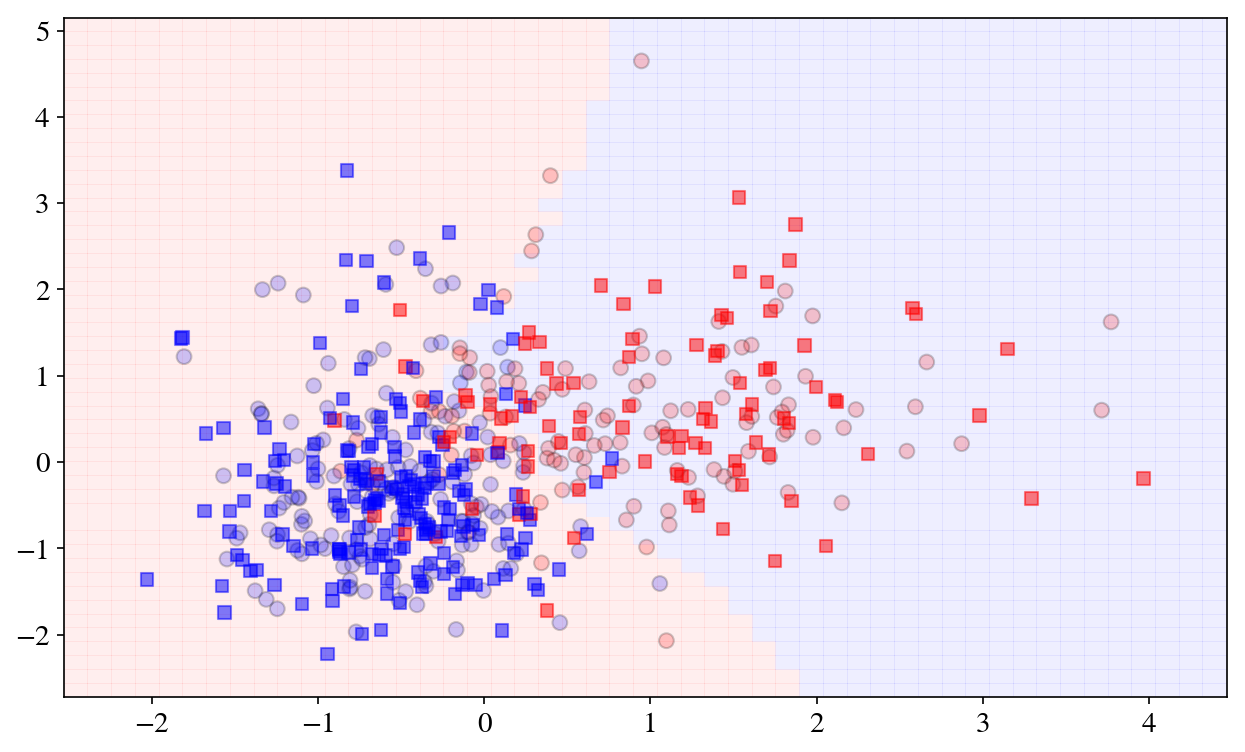

In [17]:
#Instruction8: Plot the kNN model with 20 neighbors
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

In [18]:
#df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['ID_Number', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Comcave_Points', 'Symetry', 'Fractal_dimensions', 'randNumCol'], dtype='object')


In [21]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol

In [ ]:
#akeys=[1,2,3]
avals=['North-Apulia','Calabria','South-Apulia']
amap={e[0]:e[1] for e in zip(akeys,avals)}  labeler=amap,
ax=scatter_by(dfsouthns, 'Radius', 'Texture', by='randNumCol', mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

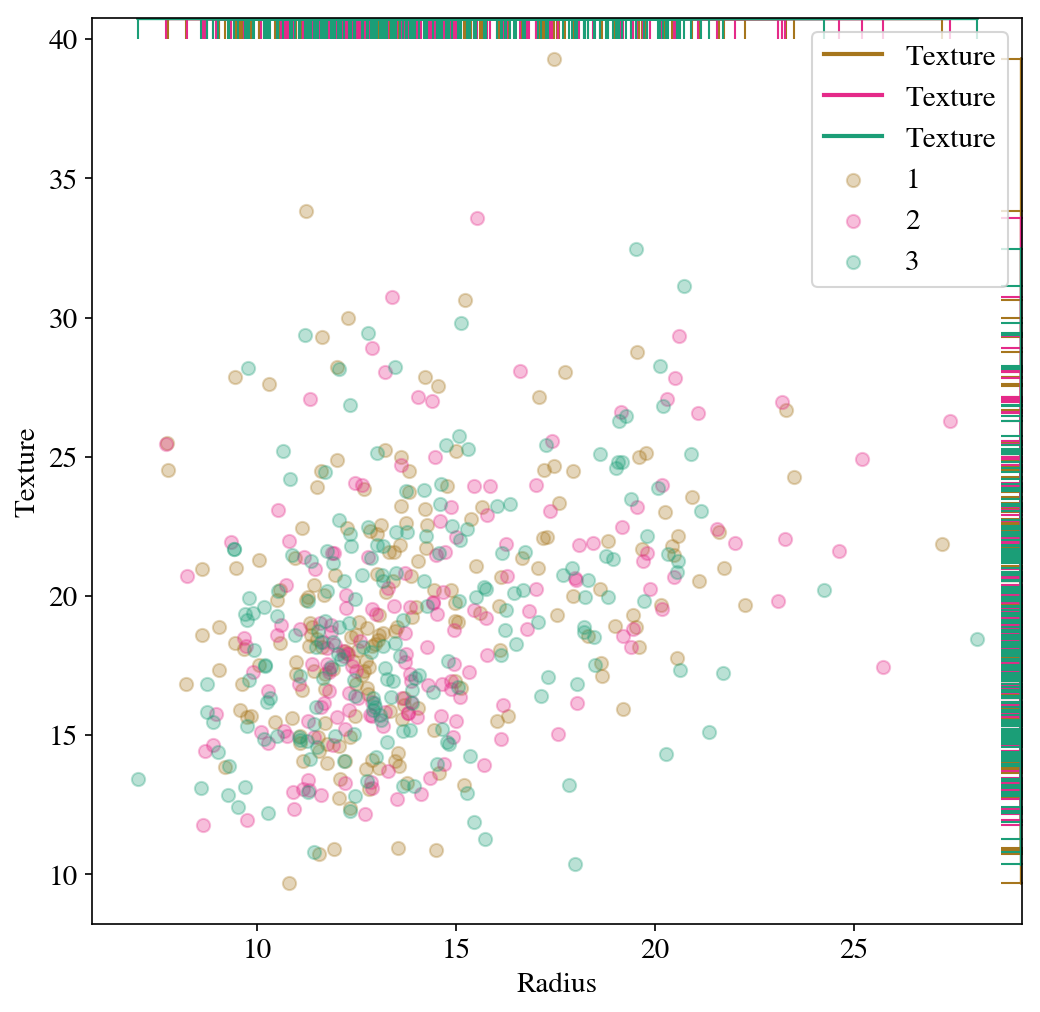

In [131]:
ax=scatter_by(df, 'Radius', 'Texture', by='randNumCol', mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');

SCORE 0.863157894737


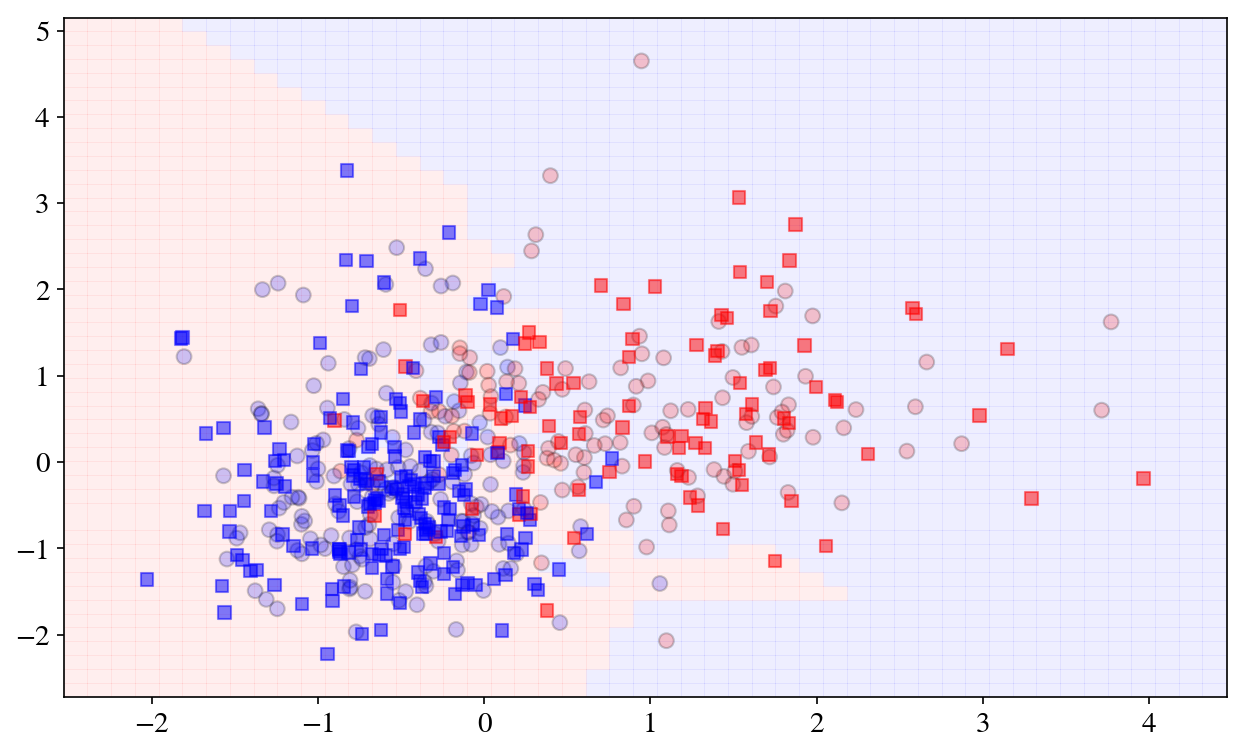

In [22]:
##Instruction9: Plot the kNN model with 1 neighbors
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf2)

SCORE 0.919298245614


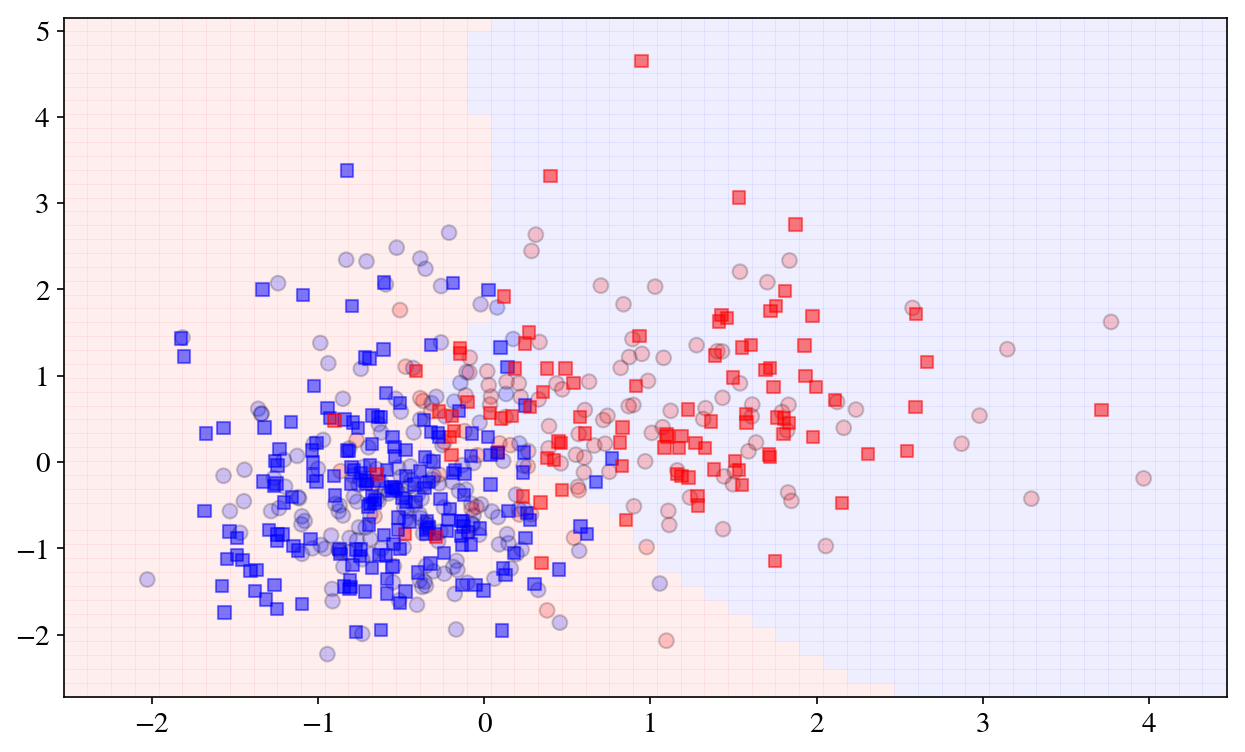

In [25]:
##Instruction10: Plot the kNN model with 35 neighbors
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf3)

In [ ]:
#Instruction 11:
# a) Develop a function to run KNN with a k from 1-80.  Split the data set into test and training and then
# plot the accuracies of the training set vs. the test set for all 80 test runs.
# b) Use "from sklearn.grid_search import GridSearchCV"  and "from sklearn.metrics import classification_report
#  to print the precision, recall, f1-score, and support
# c) Creat a plot using the GridSearchCV values.

In [34]:
#a, b
from sklearn.grid_search import GridSearchCV
k_range = list(range(1, 80))
param_grid = {"n_neighbors": np.arange(1,80,1)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = param_grid, cv=10)
grid.fit(Xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
from sklearn.metrics import classification_report
print("Detailed classification report:")
y_true, y_pred = ytest, grid.predict(Xtest)
print(classification_report(y_true, y_pred))

0.9225352112676056
{'n_neighbors': 54}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=54, p=2,
           weights='uniform')
Detailed classification report:
             precision    recall  f1-score   support

          0       0.87      0.97      0.92       179
          1       0.94      0.75      0.84       106

avg / total       0.90      0.89      0.89       285



SCORE 0.891228070175


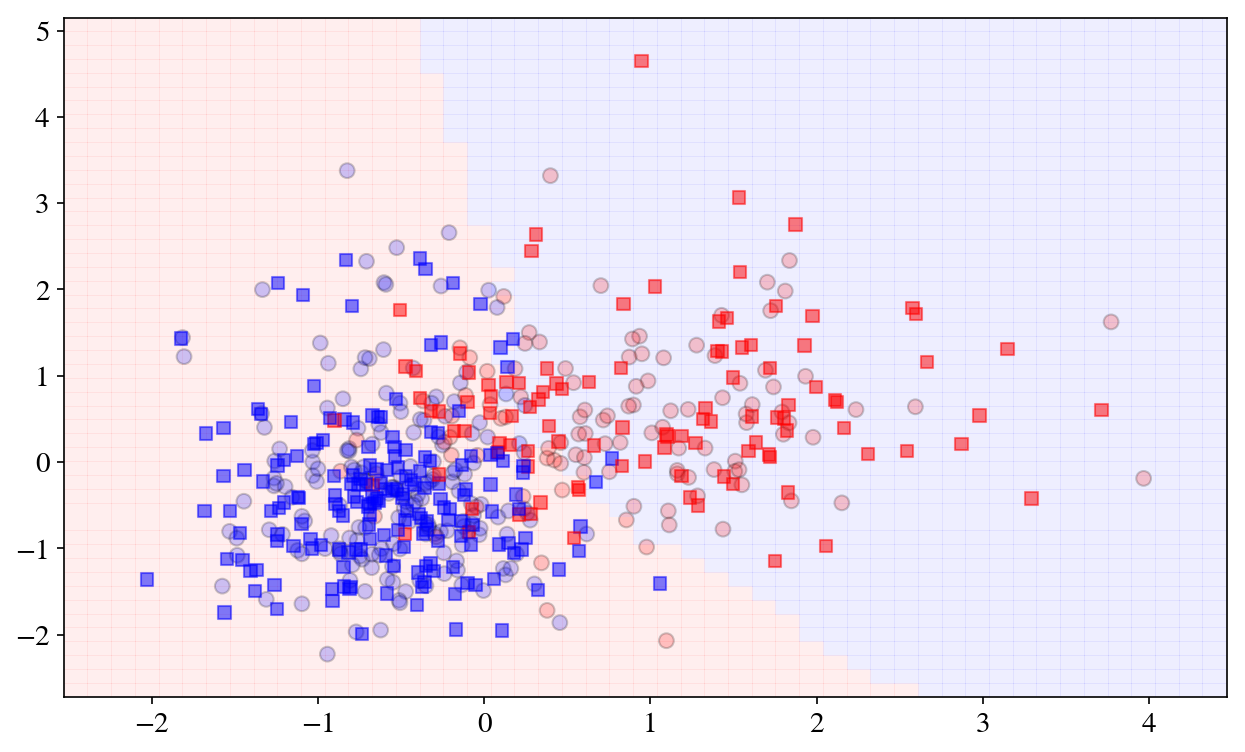

In [35]:
#c
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, grid)